# Homework 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simulating a random walk

In [2]:
# Returns a tuple of three arrays.
# The first contains the x, y, ... locations of a random walk.
# The second contains the x, y, ... measured locations of a random walk, with a measurement error.
# The third contains the times at which each random walk step occured.
# D : diffusion coefficent for the random walk.
# dt : time step for the random walk.
# T : total time for the random walk.
# sigma : uncertainty in each location measurement.
# dim : number of dimensions in which the random walk takes place.
def random_walk(D, dt, T, sigma, dim=2):
    sigma_walk = np.sqrt(2 * D * dt)
    sigma_meas = sigma
    num_steps = int(T / dt)
    
    #Note: walk_steps below is not technically the same as stipulating a step of size
    #\pm dx = np.sqrt(2 * D * dt) during each time step, since step at each time step
    #is drawn from a normal distribution, rather from the 2-element set
    #{-2 * D * dt, 2 * D * dt}
    walk_steps = np.random.normal(scale=sigma_walk, size=(num_steps + 1, dim))
    walk_steps[0] = np.zeros(dim) # zero'th step is at starting location (0, ..., 0)
    
    if float(sigma_meas) == 0.0:
        meas_errors = np.zeros([num_steps + 1, dim])
    else:
        meas_errors = np.random.normal(scale=sigma_meas, size=(num_steps + 1, dim))
    
    walk_tot = np.cumsum(walk_steps, axis=0)
    walk_tot_with_errors = walk_tot + meas_errors
    
    #Make sure start time is 0, end time is as close as possible to T without going over
    if int( T / dt) == float(T) / float(dt):
        times = np.arange(0, T + dt, dt)
    else:
        times = np.arange(0, T, dt)
    
    return walk_tot, walk_tot_with_errors, times

0.316227766017


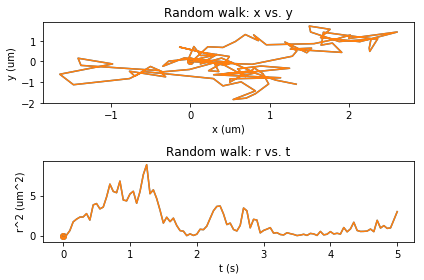

In [73]:
D_1 = 1.0
dt_1 = 50.0 / 1000.0
T_1 = 5.0
sigma_1 = 0.00
print(np.sqrt(2.0 * D_1 * dt_1))
test = random_walk(D_1, dt_1, T_1, sigma_1)

plt.clf()

plt.subplot(2, 1, 1)
plt.title('Random walk: x vs. y')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.plot(test[0][:, 0], test[0][:, 1])
plt.scatter(test[0][0, 0], test[0][0, 1])
plt.plot(test[1][:, 0], test[1][:, 1])
plt.scatter(test[1][0, 0], test[1][0, 1])

plt.subplot(2, 1, 2)
plt.title('Random walk: r vs. t')
plt.xlabel('t (s)')
plt.ylabel('r^2 (um^2)')
plt.plot(test[2], (test[0][:, 0]**2 + test[0][:, 1]**2))
plt.scatter(test[2][0], (test[0][:, 0]**2 + test[0][:, 1]**2)[0])
plt.plot(test[2], (test[1][:, 0]**2 + test[1][:, 1]**2))
plt.scatter(test[2][0], (test[1][:, 0]**2 + test[1][:, 1]**2)[0])

plt.tight_layout()
plt.show()

## Problem 4

### Part a

In [74]:
M = [10, 100, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_4a = 1.0 # time units in s, space units in um below.
dt_4a = 50.0 / 1000.0
T_4a = 5.0
sigma_4a = 0.00

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_4a = random_walk(D_4a, dt_4a, T_4a, sigma_4a)

        x_4a = walk_4a[0][:, 0]
        x_meas_4a = walk_4a[1][:, 0]
        y_4a = walk_4a[0][:, 1]
        y_meas_4a = walk_4a[1][:, 1]
        r_sq_4a = x_4a**2 + y_4a**2
        r_meas_sq_4a = x_meas_4a**2 + y_meas_4a**2
        t_4a = walk_4a[2]

        D_hat[m] = (np.sqrt(r_meas_sq_4a[-1]) - np.sqrt(r_meas_sq_4a[0]))**2 / (4 * t_4a[-1])
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

[10, 100, 1000]

[0.8684296722691609, 0.98608184002589239, 1.0017119824432292]

[0.4870968422178687, 0.71567932841491289, 0.98935601573321963]

[0.15403354624841281, 0.071567932841491294, 0.031286184265063563]


### Part b

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

[0.47108680795333524, 0.62450895232488535, 0.9641314657740927, 0.70494295650214789, 0.9988733971935998, 1.059067932067091, 0.74729512613346827, 1.4176804584596576, 1.6097106373369416, 1.5746447678763031, 0.93327243309138352, 0.90359148860820693, 1.0193071612950411, 0.88869018205141725, 0.87647984711112592, 0.70249045619885131, 0.82229807600917337, 1.0417777255579135, 1.0722348370787897, 1.0111057087005688, 0.99147526805601638, 0.95543124003985702, 1.0504413384489617, 0.98296665480827705, 0.97551701848900907, 0.99532149896550437, 0.98175896946348939]

[0.90912564947565155, 0.73307602193267896, 0.46752375242512012, 0.58372412185182454, 0.59237950047097687, 1.1896305487028125, 0.52900791462094521, 1.035966920485937, 1.8850787732171252, 1.3588455710168439, 0.55488796877650692, 0.87916625914337898, 1.123705920652432, 0.73412282894828429, 0.99694318045412622, 0.76457439529184856, 

(0, 0.1)

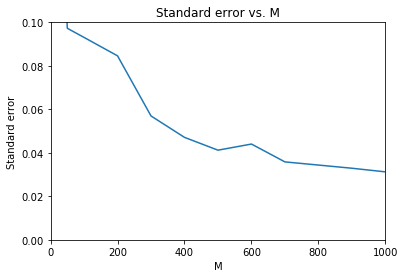

In [75]:
M = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_4a = 1.0 # time units in s, space units in um below.
dt_4a = 50.0 / 1000.0
T_4a = 5.0
sigma_4a = 0.00

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_4a = random_walk(D_4a, dt_4a, T_4a, sigma_4a)

        x_4a = walk_4a[0][:, 0]
        x_meas_4a = walk_4a[1][:, 0]
        y_4a = walk_4a[0][:, 1]
        y_meas_4a = walk_4a[1][:, 1]
        r_sq_4a = x_4a**2 + y_4a**2
        r_meas_sq_4a = x_meas_4a**2 + y_meas_4a**2
        t_4a = walk_4a[2]

        D_hat[m] = (np.sqrt(r_meas_sq_4a[-1]) - np.sqrt(r_meas_sq_4a[0]))**2 / (4 * t_4a[-1])
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
plt.xlim([0, 1000])
plt.ylim([0, 0.1])

So many trials - maybe around 500.

### Part c

[  5.20140059e+00   2.18100400e+00   1.51509474e+00   8.92786878e-01
   1.02687374e+00   1.67831169e+00   4.91992840e-01   4.75355985e-02
   1.17867115e+00   7.07649737e-01   1.83639258e+00   1.23112749e-01
   1.43022589e+00   2.27862629e-01   2.02239561e-01   3.72978325e+00
   1.33108204e+00   1.52073734e+00   1.04937422e+00   1.34599543e+00
   1.17061457e-01   2.72854878e-01   7.11459088e-01   1.63100135e+00
   3.90498925e+00   1.29861030e+00   3.20061512e-01   4.34406353e+00
   3.07066166e-01   1.12710600e+00   1.28475878e-01   1.60087284e+00
   1.59333709e+00   2.42991648e+00   4.53435754e-01   9.92615244e-03
   7.31250266e-01   1.18257625e+00   7.34141283e-01   1.74109688e-01
   3.33320698e-01   8.60732109e-01   1.95903101e-01   4.57623180e-01
   6.12687955e-01   1.22674271e-02   3.55796816e-02   6.79048136e-01
   5.27793527e-02   1.25233464e+00   1.42187398e-01   4.21171245e-01
   1.02606894e+00   2.06546281e-01   8.02600539e-01   8.72550291e-01
   3.91438765e-02   1.70346203e-01

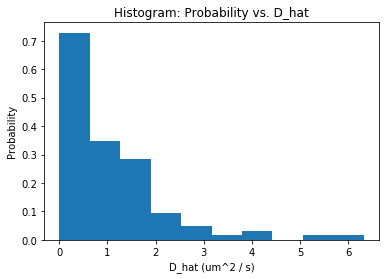

In [79]:
D_4a = 1.0 # time units in s, space units in um below.
dt_4a = 50.0 / 1000.0
T_4a = 5.0
sigma_4a = 0.00

M_val = 100

D_hat = np.zeros(M_val)

for m in range(M_val):

    walk_4a = random_walk(D_4a, dt_4a, T_4a, sigma_4a)

    x_4a = walk_4a[0][:, 0]
    x_meas_4a = walk_4a[1][:, 0]
    y_4a = walk_4a[0][:, 1]
    y_meas_4a = walk_4a[1][:, 1]
    r_sq_4a = x_4a**2 + y_4a**2
    r_meas_sq_4a = x_meas_4a**2 + y_meas_4a**2
    t_4a = walk_4a[2]

    D_hat[m] = (np.sqrt(r_meas_sq_4a[-1]) - np.sqrt(r_meas_sq_4a[0]))**2 / (4 * t_4a[-1])

print(D_hat)
print(np.mean(D_hat))

plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(D_hat, 10, normed=True)

ax1.set_title('Histogram: Probability vs. D_hat')
ax1.set_xlabel('D_hat (um^2 / s)')
ax1.set_ylabel('Probability')

plt.show()

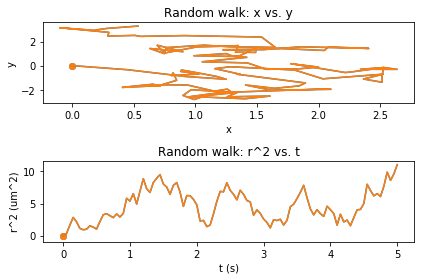

In [80]:
plt.clf()

plt.subplot(2, 1, 1)
plt.title('Random walk: x vs. y')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(walk_4a[0][:, 0], walk_4a[0][:, 1])
plt.scatter(walk_4a[0][0, 0], walk_4a[0][0, 1])
plt.plot(walk_4a[1][:, 0], walk_4a[1][:, 1])
plt.scatter(walk_4a[1][0, 0], walk_4a[1][0, 1])

plt.subplot(2, 1, 2)
plt.title('Random walk: r^2 vs. t')
plt.xlabel('t (s)')
plt.ylabel('r^2 (um^2)')
plt.plot(walk_4a[2], (walk_4a[0][:, 0]**2 + walk_4a[0][:, 1]**2))
plt.scatter(walk_4a[2][0], (walk_4a[0][:, 0]**2 + walk_4a[0][:, 1]**2)[0])
plt.plot(walk_4a[2], (walk_4a[1][:, 0]**2 + walk_4a[1][:, 1]**2))
plt.scatter(walk_4a[2][0], (walk_4a[1][:, 0]**2 + walk_4a[1][:, 1]**2)[0])

plt.tight_layout()
plt.show()

## Problem 5

### Part a

In [81]:
M = [10, 100, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_5a = 1.0 # time units in s, space units in um below.
dt_5a = 50.0 / 1000.0
T_5a = 5.0
sigma_5a = 30.00 / 1000.0

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_5a = random_walk(D_5a, dt_5a, T_5a, sigma_5a)

        x_5a = walk_5a[0][:, 0]
        x_meas_5a = walk_5a[1][:, 0]
        y_5a = walk_5a[0][:, 1]
        y_meas_5a = walk_5a[1][:, 1]
        r_sq_5a = x_5a**2 + y_5a**2
        r_meas_sq_5a = x_meas_5a**2 + y_meas_5a**2
        t_5a = walk_5a[2]

        D_hat[m] = (np.sqrt(r_meas_sq_5a[-1]) - np.sqrt(r_meas_sq_5a[0]))**2 / (4 * t_5a[-1])
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

[10, 100, 1000]

[0.99016872988538862, 0.92422457625830878, 1.0350481920466363]

[0.90518956832544994, 0.91257042784924947, 1.0639650707079373]

[0.2862460750133029, 0.091257042784924941, 0.033645529742991807]


### Part b

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000]

[0.27166626026498458, 1.2113140562995315, 0.87773039083260196, 1.2674122053921104, 0.67685938133672829, 0.834220423974257, 0.60974195214519622, 1.1732520198645315, 1.0909426313597579, 1.4327817392189435, 0.87313059971991736, 0.97028775467837447, 1.0191714430269181, 1.0529025804283885, 0.94617138886524155, 0.93144802617411904, 1.3612934968086654, 1.2253580806606634, 0.98931363690107288, 0.94902561841473698, 0.96205049985734259, 0.9883084822886351, 0.95170385050712036, 0.96931135811662572, 0.98322724106659676, 0.99769205810943629, 0.94595088857952769, 0.95583558235887622, 0.9605450420194761, 0.95904649210212733, 0.97533855968241168, 0.98727022470993508]

[0.17700215812600306, 1.6559689985476345, 0.8692589139196506, 1.0856875167350819, 0.48308443510582305, 0.7238494077822496, 0.53734685063966858, 1.1375517379960274, 0.82299439020238419, 1.275173886

(0, 0.1)

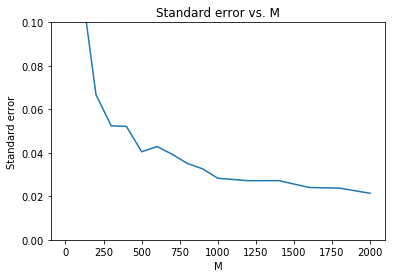

In [82]:
M = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_5b = 1.0 # time units in s, space units in um below.
dt_5b = 50.0 / 1000.0
T_5b = 5.0
sigma_5b = 30.0 / 1000.00

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_5b = random_walk(D_5b, dt_5b, T_5b, sigma_5b)

        x_5b = walk_5b[0][:, 0]
        x_meas_5b = walk_5b[1][:, 0]
        y_5b = walk_5b[0][:, 1]
        y_meas_5b = walk_5b[1][:, 1]
        r_sq_5b = x_5b**2 + y_5b**2
        r_meas_sq_5b = x_meas_5b**2 + y_meas_5b**2
        t_5b = walk_5b[2]

        D_hat[m] = (np.sqrt(r_meas_sq_5b[-1]) - np.sqrt(r_meas_sq_5b[0]))**2 / (4 * t_5b[-1])
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
#plt.xlim([0, 500])
plt.ylim([0, 0.1])

Maybe between 500 and 750 trials to get standard error below 5% in this case. The 30 nm measurement error is not that big of a deal. In fact, look at this plot below...

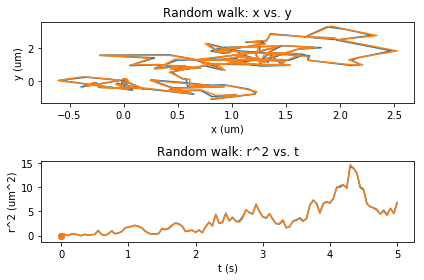

In [83]:
plt.clf()

plt.subplot(2, 1, 1)
plt.title('Random walk: x vs. y')
plt.xlabel('x (um)')
plt.ylabel('y (um)')
plt.plot(walk_5b[0][:, 0], walk_5b[0][:, 1])
plt.scatter(walk_5b[0][0, 0], walk_5b[0][0, 1])
plt.plot(walk_5b[1][:, 0], walk_5b[1][:, 1])
plt.scatter(walk_5b[1][0, 0], walk_5b[1][0, 1])

plt.subplot(2, 1, 2)
plt.title('Random walk: r^2 vs. t')
plt.xlabel('t (s)')
plt.ylabel('r^2 (um^2)')
plt.plot(walk_5b[2], (walk_5b[0][:, 0]**2 + walk_5b[0][:, 1]**2))
plt.scatter(walk_5b[2][0], (walk_5b[0][:, 0]**2 + walk_5b[0][:, 1]**2)[0])
plt.plot(walk_5b[2], (walk_5b[1][:, 0]**2 + walk_5b[1][:, 1]**2))
plt.scatter(walk_5b[2][0], (walk_5b[1][:, 0]**2 + walk_5b[1][:, 1]**2)[0])

plt.tight_layout()
plt.show()

## Problem 6

In [84]:
#normally np.polyfit() is good for polynomial fitting, but you can't use it with assumed y-intercept of 0.
#Function below can assume that y-intercept.

#polynomial fit of arrays (note: can't be lists) y to x
#deg is the polynomial degrees, e.g., if deg=[0, 1, 2], returns np.array(a, b, c)
#such that y(x) = a * x**0 + b * x**1 + c * x**2
def custom_regression(x, y, deg):
    matrix = np.stack([x**d for d in deg], axis=-1)   # stack them like columns
    coeff = np.linalg.lstsq(matrix, y)[0]    # lstsq returns some additional info we ignore

    return coeff

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]

[1.3195133245043502, 1.083261143526898, 1.4856556495118329, 1.8349273312668899, 1.2690589358651645, 0.80948758483995131, 1.0650594585164317, 1.464277876420913, 0.83328997131611438, 1.0925296639922284, 1.3518444568190975, 0.97609546501175526, 0.95010460152046317, 0.98119567445936662, 0.96017168355726734, 1.1271076651266361, 0.92337972449613415, 0.87621314553171503, 1.0197270995528245, 0.99513452991198093, 0.99949065933679748, 0.98729447311765073, 1.0286059756315407, 0.98042889149939616]

[1.6164320327118993, 0.58239532516285819, 1.4473346750858067, 1.4723311580134522, 1.3496189393331812, 0.7868313891698091, 1.0977284994763703, 1.6199866427309282, 0.48044130004532032, 0.77132510496328066, 1.0550954427590844, 0.81543279345988384, 0.84990100938964475, 0.8303416506118253, 0.75561151537729221, 0.95347580493551476, 0.76904699931120479, 0.77750564519543131, 0.92497547785487944, 0.8439948829268018,

(0, 0.1)

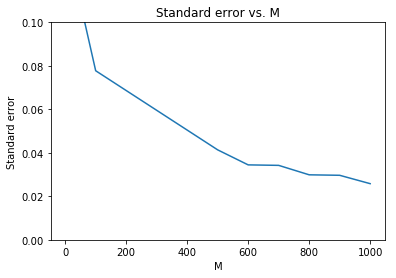

In [86]:
M = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_6 = 1.0 # time units in s, space units in um below.
dt_6 = 50.0 / 1000.0
T_6 = 5.0
sigma_6 = 30.0 / 1000.00 # problem doesn't specify measurement error but I'll assume that it's there.

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_6 = random_walk(D_6, dt_6, T_6, sigma_6)

        x_6 = walk_6[0][:, 0]
        x_meas_6 = walk_6[1][:, 0]
        y_6 = walk_6[0][:, 1]
        y_meas_6 = walk_6[1][:, 1]
        r_sq_6 = x_6**2 + y_6**2
        r_meas_sq_6 = x_meas_6**2 + y_meas_6**2
        t_6 = walk_6[2]

        #D_hat[m] = np.polyfit(t_6, r_meas_sq_6, 1)[0] / 4.0
        D_hat[m] = custom_regression(t_6, r_meas_sq_6, [1])[0] / 4.0
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
#plt.xlim([0, 500])
plt.ylim([0, 0.1])

[ 0.70389877  0.51519141  0.96254942  1.52771342  0.19391163  0.70507679
  2.36630935  0.88473197  0.6973064   0.42716664  0.86256163  0.14640165
  0.40654178  0.42803028  0.66697696  0.83619079  0.86643624  0.28272693
  1.15353596  0.84194182  1.25081165  0.37360278  0.63641969  0.84017997
  0.36860517  1.02552855  0.47693442  2.37926518  0.27042939  0.50710154
  0.57140582  0.83557703  0.20296234  0.30217387  0.5208467   0.27216883
  0.65491192  2.55832588  3.36256959  1.07861892  0.35466808  0.25885299
  0.68724735  1.79440111  2.12129269  0.58171056  0.30903255  0.79101006
  0.7247388   0.66161364  1.00504246  0.20696227  1.28109676  0.39643444
  1.77764342  0.45186688  1.61509915  0.42908564  1.72147265  0.93652293
  0.73259456  3.71893375  1.73081196  0.90709907  0.18723686  1.14899479
  0.3436367   3.27636243  1.24632734  0.52346949  0.69106782  1.36885069
  0.4797063   1.28472244  1.05492456  0.59320452  1.18529072  2.16617481
  0.29428027  0.6280427   0.33201942  2.57693449  0

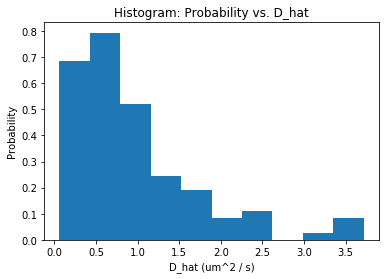

In [87]:
D_6 = 1.0 # time units in s, space units in um below.
dt_6 = 50.0 / 1000.0
T_6 = 5.0
sigma_6 = 30.0 / 1000.0

M_val = 100

D_hat = np.zeros(M_val)

for m in range(M_val):

    walk_6 = random_walk(D_6, dt_6, T_6, sigma_6)

    x_6 = walk_6[0][:, 0]
    x_meas_6 = walk_6[1][:, 0]
    y_6 = walk_6[0][:, 1]
    y_meas_6 = walk_6[1][:, 1]
    r_sq_6 = x_6**2 + y_6**2
    r_meas_sq_6 = x_meas_6**2 + y_meas_6**2
    t_6 = walk_6[2]

    #D_hat[m] = np.polyfit(t_6, r_meas_sq_6, 1)[0] / 4.0
    D_hat[m] = custom_regression(t_6, r_meas_sq_6, [1])[0] / 4.0

print(D_hat)
print(np.mean(D_hat))

plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(D_hat, 10, normed=True)

ax1.set_title('Histogram: Probability vs. D_hat')
ax1.set_xlabel('D_hat (um^2 / s)')
ax1.set_ylabel('Probability')

plt.show()

Below, note how rough each linear fit is individually.

Also note that, given that r^2(0) = 0 and we are fitting <r^2> = 4 D t, not <r^2> = 4 D t + constant, we should force a y-intercept of 0 (orange line below).

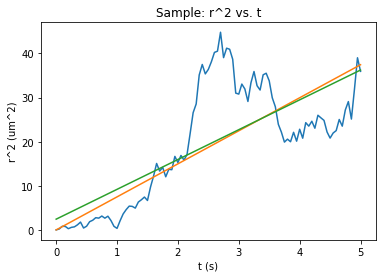

In [88]:
plt.clf()
plt.plot(t_6, r_meas_sq_6)
#sample_linear_fit = np.polyfit(t_6, r_meas_sq_6, 1)
sample_linear_fit_1 = custom_regression(t_6, r_meas_sq_6, [1])
sample_linear_fit_2 = custom_regression(t_6, r_meas_sq_6, [0, 1])

plt.title('Sample: r^2 vs. t')
plt.xlabel('t (s)')
plt.ylabel('r^2 (um^2)')

plt.plot(t_6, t_6 * sample_linear_fit_1[0])
plt.plot(t_6, t_6 * sample_linear_fit_2[1] + sample_linear_fit_2[0])

## Problem 7

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]

[1.2439136907175412, 2.2792809769410955, 1.8231014788481299, 1.8244139398484809, 0.63058628658809301, 0.77715331984009806, 0.48650409168858472, 0.62581784114025807, 0.99809825628309812, 1.55488450573359, 0.96565111854819574, 1.0000049375215978, 0.94147249945256395, 1.1849309816828912, 1.1522092032276281, 0.86755069949291164, 0.93267587884115377, 0.97099941340984697, 0.96522096560645665, 0.9443386597170903, 0.98683697612772447, 1.0156645422041279, 0.98059435818108542, 0.94952320501425391]

[0.8832040083367545, 4.2545755611045042, 1.7760327090209309, 0.99112059975146216, 0.51189300294510909, 1.1476215446310805, 0.36985520487839924, 0.56703647824345538, 1.5538960012084986, 1.4668056858350258, 0.98325073054811474, 0.82318334868805199, 0.97777520054411571, 0.9371535914175132, 0.93517261594923584, 0.74334319566745499, 0.92908428868050441, 0.95574883140968592, 1.0066186860349777, 0.99170779570699

(0, 0.1)

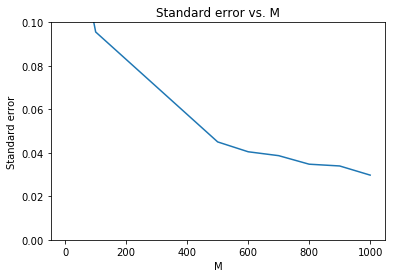

In [89]:
M = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_7 = 1.0 # time units in s, space units in um below.
dt_7 = 50.0 / 1000.0
T_7 = 5.0
sigma_7 = 30.0 / 1000.00 # problem doesn't specify measurement error but I'll assume that it's there.
tau_over_dt_max = 10 # step sizes are tau = 1 * dt, 2 * dt, ..., tau_over_dt_max * dt

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_7 = random_walk(D_7, dt_7, T_7, sigma_7)

        x_7 = walk_7[0][:, 0]
        x_meas_7 = walk_7[1][:, 0]
        y_7 = walk_7[0][:, 1]
        y_meas_7 = walk_7[1][:, 1]
        r_sq_7 = x_7**2 + y_7**2
        r_meas_sq_7 = x_meas_7**2 + y_meas_7**2
        t_7 = walk_7[2]
        
        r_meas_sq = np.zeros(int(len(t_7) / tau_over_dt_max))
        tau = np.zeros(int(len(t_7) / tau_over_dt_max))
        
        for N in range(int(len(t_7) / tau_over_dt_max)):
            r_meas_sq[N] = np.mean(np.diff(r_meas_sq_7[::(N + 1)]))
            tau[N] = np.mean(np.diff(t_7[::(N + 1)]))
        D_hat[m] = custom_regression(tau, r_meas_sq, [1])[0] / 4.0
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print()
print(D_hat_std)
print()
print(D_hat_ste)

plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
#plt.xlim([0, 500])
plt.ylim([0, 0.1])

[ 0.23464808  0.97076992  2.40859114  1.86488933  0.08664039  0.71019594
  0.1810608   0.3279613   0.30245216  0.53768192  0.51443743  0.52799774
  0.16533171  0.54755954  1.21513108  0.04530268  0.32647969  0.88398901
  1.12375708  0.73544957  0.38002877  0.27932904  0.38396339  1.79596521
  1.32608253  2.50693035  2.70371054  0.35797882  3.68869129  0.87408645
  1.06939494  0.42658357  0.31821489  1.4829436   0.15948259  1.80314343
  1.30283764  1.06611974  0.4937209   0.7033818   1.59788649  1.233143
  0.63774671  2.44888725  0.53402316  2.99382705  1.28203096  0.1697177
  0.68667573  0.28948682  0.88773052  2.4452555   0.87393954  1.52023985
  0.89076333  0.93348365  0.92956861  0.37278518  0.37465189  4.43565801
  0.85612113  1.11731382  0.06644674  0.43887763  0.13297224  0.17423822
  1.08562314  0.07382404  1.15767736  2.82020551  0.71760678  3.23430594
  0.0444859   1.78172519  0.19074141  0.15276711  1.04840164  1.27325327
  0.71247171  0.0758038   1.76216154  1.62641632  1.84

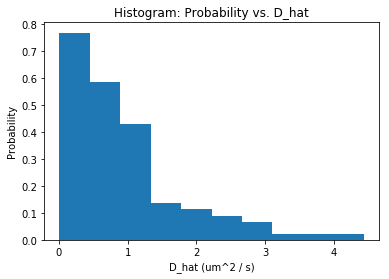

In [92]:
D_7 = 1.0 # time units in s, space units in um below.
dt_7 = 50.0 / 1000.0
T_7 = 5.0
sigma_7 = 30.0 / 1000.0
tau_over_dt_max = 10

M_val = 100

D_hat = np.zeros(M_val)

for m in range(M_val):

    walk_7 = random_walk(D_7, dt_7, T_7, sigma_7)
    
    x_7 = walk_7[0][:, 0]
    x_meas_7 = walk_7[1][:, 0]
    y_7 = walk_7[0][:, 1]
    y_meas_7 = walk_7[1][:, 1]
    r_sq_7 = x_7**2 + y_7**2
    r_meas_sq_7 = x_meas_7**2 + y_meas_7**2
    t_7 = walk_7[2]
    
    r_meas_sq = np.zeros(int(len(t_7) / tau_over_dt_max))
    tau = np.zeros(int(len(t_7) / tau_over_dt_max))
    
    for N in range(int(len(t_7) / tau_over_dt_max)):
        r_meas_sq[N] = np.mean(np.diff(r_meas_sq_7[::(N + 1)]))
        tau[N] = np.mean(np.diff(t_7[::(N + 1)]))
    D_hat[m] = custom_regression(tau, r_meas_sq, [1])[0] / 4.0

print(D_hat)
print(np.mean(D_hat))

plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(D_hat, 10, normed=True)

ax1.set_title('Histogram: Probability vs. D_hat')
ax1.set_xlabel('D_hat (um^2 / s)')
ax1.set_ylabel('Probability')
plt.show()

To get an idea of what one of them look like...

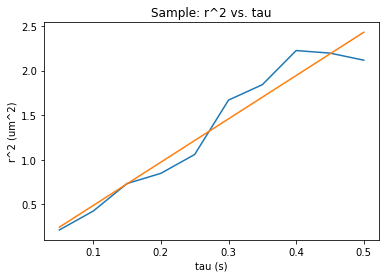

In [93]:
plt.clf()
sample_linear_fit_1 = custom_regression(tau, r_meas_sq, [1])

plt.title('Sample: r^2 vs. tau')
plt.xlabel('tau (s)')
plt.ylabel('r^2 (um^2)')

plt.plot(tau, r_meas_sq)
plt.plot(tau, tau * sample_linear_fit_1[0])

## Problem 8

In [96]:
test = np.arange(1, 10)
print(test)
print(test[1:])
print(test[:-1])

[1 2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8]


[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]

[0.90089388511639112, 1.0082306040290587, 0.99207919601232364, 1.1852870796830373, 1.0033310514557796, 1.0188156637466519, 0.96684598038304603, 1.008614115963776, 1.0440965480993478, 0.94086747764391665, 1.0250777692594375, 1.005225008822763, 1.0244620784916996, 1.0149356237430862, 1.0047239382809434, 1.0057760739069541, 1.0223976354067934, 1.021346526709908, 1.000041683344868, 1.0050990255323387, 1.01016374777678, 1.0121653965889952, 1.0110673044808904, 1.0118255207634352]
1.0101403723

[0.23243855412028958, 0.08234703568290147, 0.030335820694136942, 0.24764240780269373, 0.13430805891370359, 0.082693519301192175, 0.10133220698788822, 0.11032318650497271, 0.1438128016435273, 0.10430486395648011, 0.14236641042419498, 0.14347541365012681, 0.12370539385078609, 0.11122366858262051, 0.12593651622275098, 0.13673796719617193, 0.11807185570004286, 0.12465319438020701, 0.12077498205081674, 0.115754

(0, 0.1)

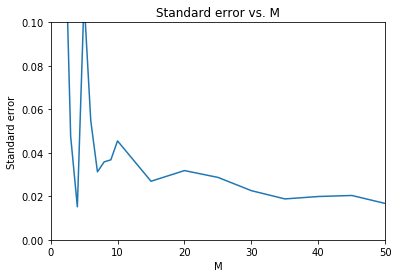

In [101]:
M = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 100, 500, 600, 700, 800, 900, 1000]
D_hat_mean = [0 for item in M]
D_hat_std = [0 for item in M]
D_hat_ste = [0 for item in M]

D_8 = 1.0 # time units in s, space units in um below.
dt_8 = 50.0 / 1000.0
T_8 = 5.0
sigma_8 = 30.0 / 1000.00 # problem doesn't specify measurement error but I'll assume that it's there.

for M_ind in range(len(M)):

    D_hat = np.zeros(M[M_ind])

    for m in range(M[M_ind]):

        walk_8 = random_walk(D_8, dt_8, T_8, sigma_8)

        x_8 = walk_8[0][:, 0]
        x_meas_8 = walk_8[1][:, 0]
        y_8 = walk_8[0][:, 1]
        y_meas_8 = walk_8[1][:, 1]
        r_sq_8 = x_8**2 + y_8**2
        r_meas_sq_8 = x_meas_8**2 + y_meas_8**2
        t_8 = walk_8[2]

        D_hat_x = (1 / (2.0 * dt_8)) * (np.mean(np.diff(x_meas_8)**2) + np.mean(np.diff(x_meas_8[:-1]) * np.diff(x_meas_8[1:])))
        D_hat_y = (1 / (2.0 * dt_8)) * (np.mean(np.diff(y_meas_8)**2) + np.mean(np.diff(y_meas_8[:-1]) * np.diff(y_meas_8[1:])))
        D_hat[m] = np.mean([D_hat_x, D_hat_y])
    
    D_hat_mean[M_ind] = np.mean(D_hat)
    D_hat_std[M_ind] = np.std(D_hat) * len(D_hat) / (len(D_hat) - 1)
    D_hat_ste[M_ind] = D_hat_std[M_ind] / np.sqrt(M[M_ind])

print(M)
print()
print(D_hat_mean)
print(np.mean(D_hat_mean))
print()
print(D_hat_std)
print()
print(D_hat_ste)

plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
plt.xlim([0, 50])
plt.ylim([0, 0.1])

(0, 0.1)

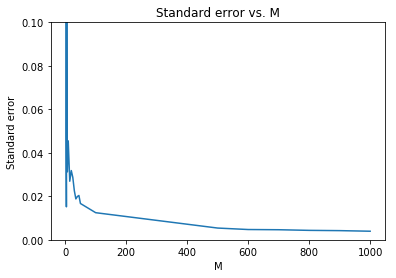

In [102]:
plt.clf()
plt.title('Standard error vs. M')
plt.xlabel('M')
plt.ylabel('Standard error')
plt.plot(M, D_hat_ste)
#plt.xlim([0, 50])
plt.ylim([0, 0.1])

[ 0.94631167  1.09512346  1.01928803  0.94013093  1.0764811   1.03505738
  0.88172329  0.84229564  0.81597341  1.03918124  0.85511174  1.02330219
  1.15152224  0.93389713  0.77114328  1.03582659  1.05475817  0.94083781
  0.75806316  0.90005845  1.06312642  0.84060643  1.02680048  0.87887946
  0.88964296  0.9302987   1.03260188  0.90680757  0.85217672  0.87889744
  0.83905513  0.95694982  0.73825923  1.0472151   0.84698533  1.0927469
  1.34521404  0.97713235  0.87213431  1.03041196  0.98005957  0.88593244
  0.95383986  1.0682459   1.14830485  1.07867497  1.02070169  0.99173099
  1.14250433  0.97823256  0.98709737  0.92041789  0.97068671  1.05558281
  0.98373965  1.19187905  1.25141071  1.02515076  0.8938111   1.410687
  0.86660154  0.90582579  1.21542361  0.83830976  0.9019007   1.03782679
  0.84478646  1.00003198  0.90398615  0.97501675  1.06586391  1.06493298
  1.22792091  0.70242318  1.17081163  1.04226094  0.94376427  0.97408181
  1.19510067  1.03435887  0.8858929   1.140598    1.11

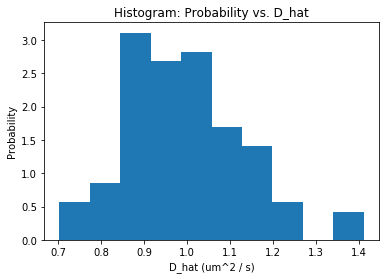

In [103]:
D_8 = 1.0 # time units in s, space units in um below.
dt_8 = 50.0 / 1000.0
T_8 = 5.0
sigma_8 = 30.0 / 1000.0

M_val = 100

D_hat = np.zeros(M_val)

for m in range(M_val):

    walk_8 = random_walk(D_8, dt_8, T_8, sigma_8)

    x_8 = walk_8[0][:, 0]
    x_meas_8 = walk_8[1][:, 0]
    y_8 = walk_8[0][:, 1]
    y_meas_8 = walk_8[1][:, 1]
    r_sq_8 = x_8**2 + y_8**2
    r_meas_sq_8 = x_meas_8**2 + y_meas_8**2
    t_8 = walk_8[2]

    D_hat_x = (1 / (2.0 * dt_8)) * (np.mean(np.diff(x_meas_8)**2) + np.mean(np.diff(x_meas_8[:-1]) * np.diff(x_meas_8[1:])))
    D_hat_y = (1 / (2.0 * dt_8)) * (np.mean(np.diff(y_meas_8)**2) + np.mean(np.diff(y_meas_8[:-1]) * np.diff(y_meas_8[1:])))
    D_hat[m] = np.mean([D_hat_x, D_hat_y])

print(D_hat)
print(np.mean(D_hat))

plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(D_hat, 10, normed=True)

ax1.set_title('Histogram: Probability vs. D_hat')
ax1.set_xlabel('D_hat (um^2 / s)')
ax1.set_ylabel('Probability')

plt.show()